# Aufgabe 30: Data Mining Anwendung - Gamma/Hadron Klassifizierung

## Aufgabenteil a)

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [92]:
df = pd.read_hdf('image_parameters_smd_reduced.hdf5') # loading the data

# making the labels
y = np.asarray(df.corsika_run_header_particle_id)
y[y == 14] = 0

# generating an array of features to feed into the random forest
corsika_event_header_total_energy = np.asarray(df.corsika_event_header_total_energy)
#size = np.asarray(df['size']) # because df.size actually returns the size of the dataframe...
width = np.asarray(df.width)
#leakage1 = np.asarray(df.leakage1)
#leakage2 = np.asarray(df.leakage2)
length = np.asarray(df.length)
photoncharge_shower_mean = np.asarray(df.photoncharge_shower_mean)
photoncharge_shower_variance = np.asarray(df.photoncharge_shower_variance)
X = np.vstack((corsika_event_header_total_energy, length, width, photoncharge_shower_mean, photoncharge_shower_variance)).T

# Generating a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

Wir haben uns für die im Code angegebenen Features entschieden, da mit diesen eine recht hohe Accuracy bzw. ein hoher AUC-Score erreicht wurde (durch ausprobieren). Unserer Meinung nach darf nur die ID als Feature nicht verwendet werden, da nach dieser ja gerade diskriminiert werden soll.

## Aufgabenteil b)

In [93]:
n = np.array([1,10,100])
for n_estimators in n:
    # Creating a random forest with sklearn:
    forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = 2, random_state = 0)
    # Hinweis: sklearn.model_selection.cross_val_score ist in der Aufgabe angegeben.
    # Ich verstehe aber nicht, wie man das benutzt, daher erst mal so. Geht das besser?
    scores = cross_val_score(forest,X_train,y_train,cv=5)
    print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2), "using", n_estimators, "estimator(s)")
    # doppelte Standardabweichung entspricht 95prozentiger Konfidenz
print("Deswegen ist bei uns momentan n=10 das beste anscheinend.")

Accuracy: 0.696 (+/- 0.005) using 1 estimator(s)
Accuracy: 0.752 (+/- 0.005) using 10 estimator(s)
Accuracy: 0.731 (+/- 0.008) using 100 estimator(s)
Deswegen ist bei uns momentan n=10 das beste anscheinend.


## Aufgabenteile c) und d)

Area under curve: 0.787334669056


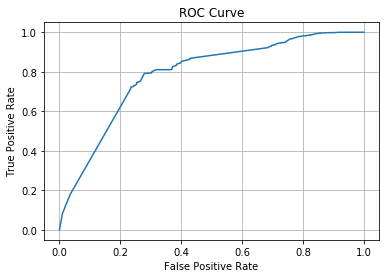

In [94]:
forest = RandomForestClassifier(n_estimators = 10, max_depth = 2, random_state = 0)
forest.fit(X_train, y_train)
probas = forest.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
print('Area under curve:', roc_auc_score(y_test, probas[:,1]))
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
plt.clf()

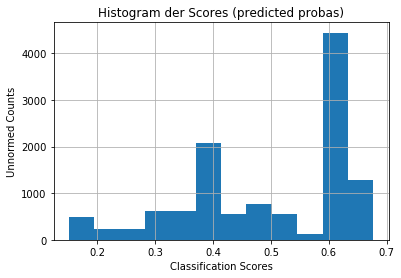

In [95]:
entries, binEdges = np.histogram(probas[:,1], bins=12)
plt.hist(probas[:,1], bins=binEdges)
plt.title('Histogram der Scores (predicted probas)')
plt.ylabel('Unnormed Counts')
plt.xlabel('Classification Scores')
plt.grid()
plt.show()

Zu erkennen sind zwei Peaks, die man mit den zwei Teilchenarten identifizieren kann. Bei dem Peak mit dem höheren
classification score würde es sich in diesem Fall dann um die Gammas handeln und bei dem anderen entsprechend um die
Hadronen. Prinzipiell wäre es dann also möglich das Signal vom Untergrund zu trennen, wobei der Erfolg dabei davon abhängt
wie gut der RandomForest die Teilchen unterscheiden kann. <br>
Bei einem Perfekten Klassifizierer wäre die ROC Kurve einfach eine konstante Gerade bei 1 (Indikatorfunktion) und die Verteilung der Gamma- und Hadronereignisse entlang der classification score hätte einfach zwei Peaks bei 0 und 1. Dies veranschaulichen wir ein mal in der folgenden Zellen, wo wir als einziges Feature die Labels übergeben.

1.0


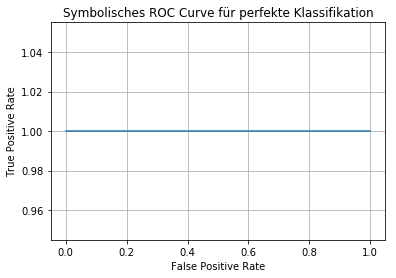

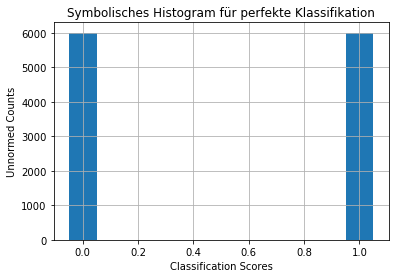

In [96]:
#Perfekte Klassifizierung möglich durch Unterscheidung 
X = np.vstack(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#ROC Kurve für perfekten Klassifizierer
forest = RandomForestClassifier(n_estimators = 10, max_depth = 2, random_state = 0)
forest.fit(X_train, y_train)
probas = forest.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
print(roc_auc_score(y_test, probas[:,1]))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Symbolisches ROC Curve für perfekte Klassifikation')
plt.grid()
plt.show()
plt.clf()

#Verteilung für perfekten Klassifizierer
entries, binEdges = np.histogram(probas[:,1], bins=10)
binEdges -= 0.05
binEdges = np.append(binEdges, 1.05)
plt.hist(probas[:,1], bins=binEdges)
plt.title('Symbolisches Histogram für perfekte Klassifikation')
plt.ylabel('Unnormed Counts')
plt.xlabel('Classification Scores')
plt.grid()
plt.show()